# Quick-and-dirty experimental image viewer

In [1]:
#%matplotlib inline
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import hh_utilities as hu

In [2]:
plt.rcParams["figure.figsize"] = (20,12)

In [3]:
data_dir = "/media/hh/hd_internal/_data_DS/DSR/satelliteImages/Borneo/3093/"
# AnalyticMS_SR
dataset = gdal.Open(data_dir + "20170919_015559_0f4e_3B_AnalyticMS.tif", gdal.GA_ReadOnly)
nLayer = dataset.RasterCount
for k in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(k)
    if k == 1:
        imgArr = band.ReadAsArray()
        sz = np.shape(imgArr)
        imgArr = imgArr.reshape((sz[0], sz[1], 1))
    else:
        imgArr = np.append(imgArr, band.ReadAsArray().reshape((sz[0], sz[1], 1)), axis = 2)


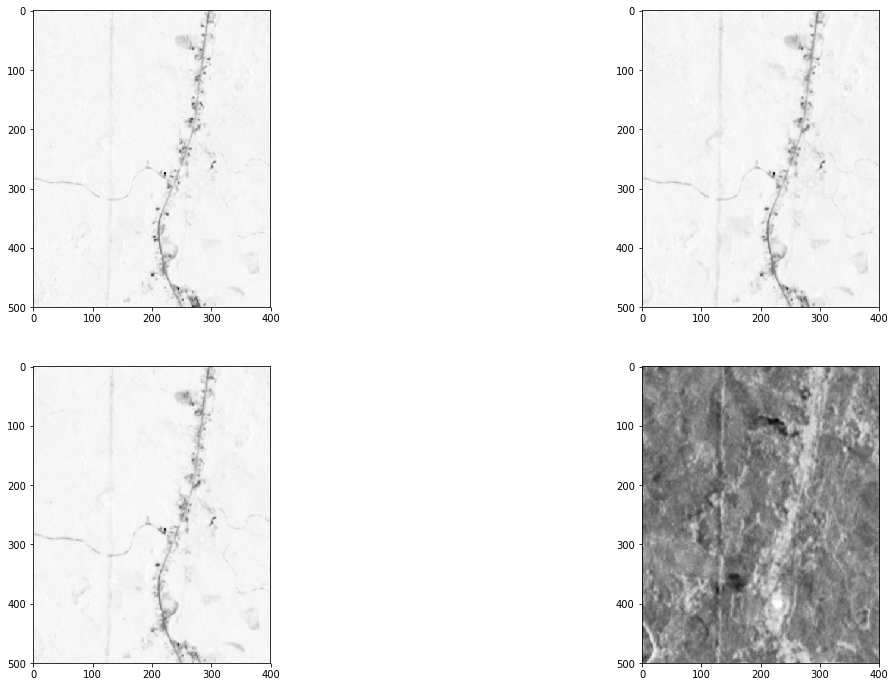

In [4]:
for k in range(nLayer):
    # scale and convert to float
    img = imgArr[1000:1500,1400:1800,k].copy()
    #img = 1000 - img
    # lim = 2 * np.median(img)
    #img[img>lim] = lim
    # print(np.min(img), np.max(img))
    #print(np.median(img))
    #img = (img / (np.max(img))).astype(np.float)
    #print(np.median(img))
    plt.subplot(2, 2, k+1)
    ax = plt.imshow(img, cmap=plt.cm.Greys)
    


In [5]:
whos

Variable   Type         Data/Info
---------------------------------
ax         AxesImage    AxesImage(923.76,108;237.207x296.509)
band       Band         <osgeo.gdal.Band; proxy o<...>w *' at 0x7f3c83c0c060> >
data_dir   str          /media/hh/hd_internal/_da<...>elliteImages/Borneo/3093/
dataset    Dataset      <osgeo.gdal.Dataset; prox<...>w *' at 0x7f3c83c0c0f0> >
gdal       module       <module 'osgeo.gdal' from<...>-packages/osgeo/gdal.py'>
hu         module       <module 'hh_utilities' fr<...>modules/hh_utilities.py'>
img        ndarray      500x400: 200000 elems, type `uint16`, 400000 bytes (390.625 kb)
imgArr     ndarray      4397x9022x4: 158678936 elems, type `uint16`, 317357872 bytes (302.6560516357422 Mb)
k          int          3
nLayer     int          4
np         module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sz         tuple        n=2


(array([2.200e+01, 3.400e+01, 2.100e+01, 1.700e+01, 1.400e+01, 8.000e+00,
        1.300e+01, 7.000e+00, 1.100e+01, 8.000e+00, 1.400e+01, 1.100e+01,
        9.000e+00, 1.500e+01, 1.900e+01, 2.100e+01, 2.800e+01, 3.200e+01,
        4.000e+01, 5.200e+01, 7.300e+01, 7.700e+01, 1.250e+02, 1.700e+02,
        2.400e+02, 3.540e+02, 3.630e+02, 4.830e+02, 5.620e+02, 6.550e+02,
        7.180e+02, 7.610e+02, 8.340e+02, 8.520e+02, 9.390e+02, 1.081e+03,
        1.138e+03, 1.241e+03, 1.384e+03, 1.558e+03, 1.706e+03, 1.944e+03,
        1.969e+03, 2.243e+03, 2.628e+03, 2.964e+03, 3.349e+03, 4.083e+03,
        4.568e+03, 5.231e+03, 5.966e+03, 6.631e+03, 7.262e+03, 8.102e+03,
        8.735e+03, 9.211e+03, 9.405e+03, 9.782e+03, 9.878e+03, 9.878e+03,
        9.751e+03, 9.336e+03, 8.560e+03, 7.647e+03, 6.738e+03, 5.560e+03,
        4.661e+03, 3.768e+03, 3.191e+03, 2.585e+03, 1.971e+03, 1.446e+03,
        1.093e+03, 8.520e+02, 6.570e+02, 5.110e+02, 4.160e+02, 3.140e+02,
        2.720e+02, 2.470e+02, 1.880e+0

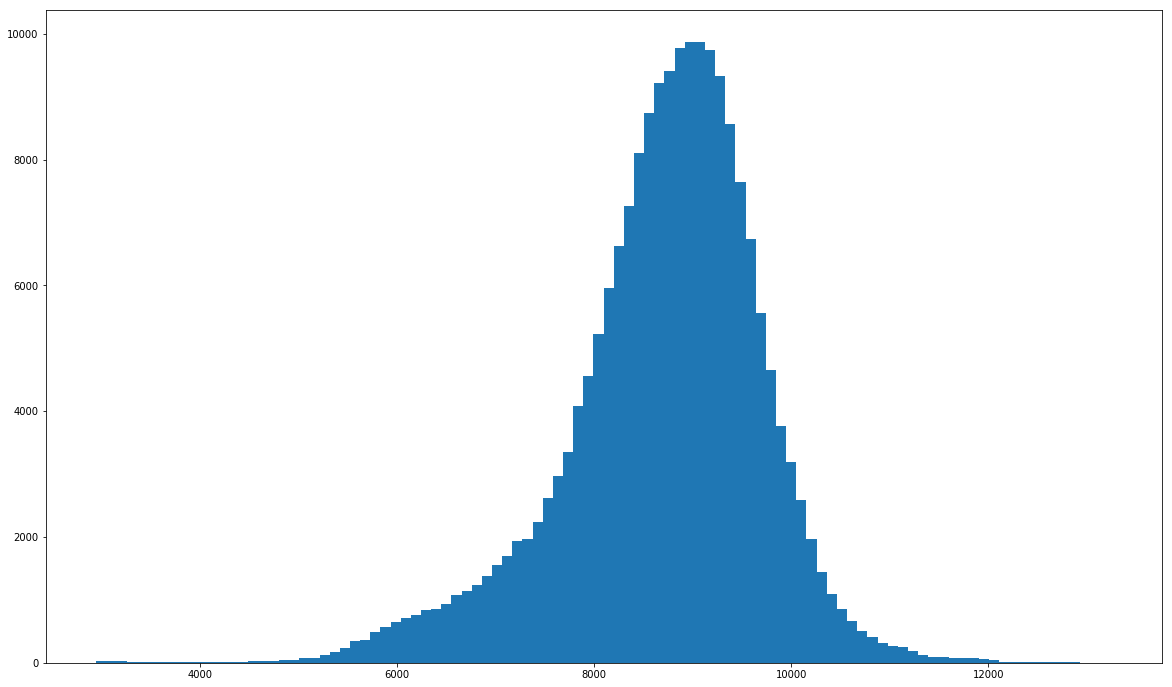

In [6]:
plt.hist(img.ravel(),100)

In [7]:
# from PIL import Image
# im = Image.open(data_dir + "20170509_032544_1_0c19_3B_AnalyticMS.tif")